**Face Swapping**

References: 
1. https://www.learnopencv.com
2. https://docs.opencv.org
3. https://pypi.python.org/pypi/dlib
4. https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
5. https://github.com/AKSHAYUBHAT/TensorFace/blob/master/openface/models/dlib/shape_predictor_68_face_landmarks.dat

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import dlib
%matplotlib inline

In [206]:
im1=cv2.imread("1.jpg")
im2=cv2.imread("2.png")

First we will try to convert our image to Gray image so as to reduce the computations. I tried with RGB image, but it was increasing computations and my machine was not able to handle it.

In [207]:
im1_gray=cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray=cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)

In the begining, I thought of following the histogram so as to check the histogram oriented gradient in the image. Hence I plotted below graphs to do preliminary survey.
The gradiend will give us the border lines or the interface between two objects which will differenciate between both the objects.

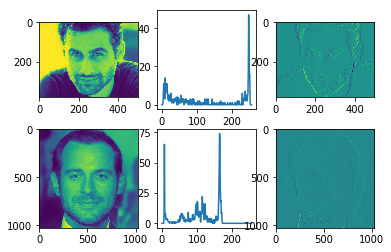

In [146]:
plt.subplot(231)
#for i in plot_images:
plt.imshow(im1_gray)
plt.subplot(232)
histogram1=cv2.calcHist(im1_gray,[1],None,[256],[0,256])
plt.plot(histogram1)
plt.subplot(233)
sobelx = cv2.Sobel(im1_gray,cv2.CV_64F,1,0,ksize=5)
plt.imshow(sobelx)
plt.subplot(234)
plt.imshow(im2_gray)
plt.subplot(235)
histogram2=cv2.calcHist(im2_gray,[1],None,[256],[0,256])
plt.plot(histogram2)
plt.subplot(236)
sobelx = cv2.Sobel(im2_gray,cv2.CV_64F,1,0,ksize=5)
plt.imshow(sobelx)

While going through the online resources available I came across get_frontal_face_detector in dlib library which can help me in detecting the face. I will be using share_predictor of face by using:shape_predictor_68_face_landmarks.dat

In [21]:
detect=dlib.get_frontal_face_detector()

In [23]:
predict=dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

**The below function will find out the landmark/ shape of the face.**

In [65]:
def find_outline(Image):
    dets = detect(Image, 1)
    for i, j in enumerate(dets):
        print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        i, j.left(), j.top(), j.right(), j.bottom()))
        shape = predict(Image, j)
        print("Part 0: {}, Part 1: {}".format(shape.part(0),shape.part(1)))
    return shape,dets

In [67]:
win = dlib.image_window()
shape1,dets1=find_outline(im1_gray)
win.add_overlay(shape1)

Detection 0: Left: 111 Top: 82 Right: 379 Bottom: 350
Part 0: (133, 164), Part 1: (133, 197)


In [201]:
rects=detect(im1_gray,1)
face_coor=np.matrix([[p.x, p.y] for p in predict(im1_gray, rects[0]).parts()])

In the Below cell we will try to get the mask of the face. For this we will use convex_hull whih will extract the boundries of the face_mask which we need.
I need to manipulate the values for OVERLAY_POINTS so that proper face will be chosen

In [208]:
def face_mask(image):
    LEFT_EYE_POINTS = list(range(5,24))
    RIGHT_EYE_POINTS = list(range(28,44))
    LEFT_BROW_POINTS = list(range(8, 28))
    RIGHT_BROW_POINTS = list(range(28, 48))
    NOSE_POINTS = list(range(20, 25))
    MOUTH_POINTS = list(range(33, 48))
    OVERLAY_POINTS = [
        LEFT_EYE_POINTS + RIGHT_EYE_POINTS + LEFT_BROW_POINTS + RIGHT_BROW_POINTS,
        NOSE_POINTS + MOUTH_POINTS,
        ]
    rects=detect(image,1)
    face_coor=np.matrix([[p.x, p.y] for p in predict(image, rects[0]).parts()])
    im = np.zeros(image.shape[:2], dtype=np.float64)
    for group in OVERLAY_POINTS:
        points = cv2.convexHull(face_coor[group])
        b=cv2.fillConvexPoly(image, face_coor, color=1)
    im = np.array([im, im,im]).transpose((1, 2,0))
    im = (cv2.GaussianBlur(im, (11, 11), 0) > 0) * 1.0
    im = cv2.GaussianBlur(im, (11, 11), 0)
    return im

In [209]:
image=face_mask(im1_gray)

In [189]:
u=list(face_coor[:,0])
v=list(face_coor[:,1])

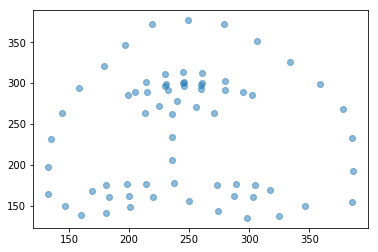

In [190]:
plt.scatter(u,v, alpha=0.5)

In [211]:
#output_im = numpy.zeros(dshape, dtype=im.dtype)
#imsh=im1_gray.shape
#cv2.warpAffine(im1_gray,M[:2],(imsh[0], imsh[1]),dst=output_im,borderMode=cv2.BORDER_TRANSPARENT,flags=cv2.WARP_INVERSE_MAP)

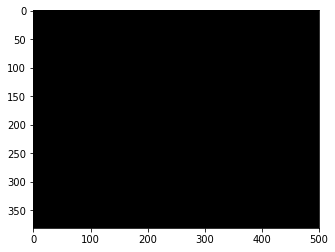

In [210]:
plt.imshow(image)